# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Exploring The Data

In [33]:
rawCsvTrain = pd.read_csv("D:\\Data sets\\Sustainability\\train.csv")
rawCsvTest = pd.read_csv("D:\\Data sets\\Sustainability\\test.csv")

In [34]:
rawCsvSample = pd.read_csv("D:\\Data sets\\Sustainability\\sample_submission.csv")

In [35]:
completeDf = rawCsvTrain.copy()
testDf = rawCsvTest.copy()

In [36]:
completeDf.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [37]:
testDf.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [38]:
completeDf.shape, testDf.shape

((175296, 18), (17520, 18))

# Handling The Missing Values

<AxesSubplot:>

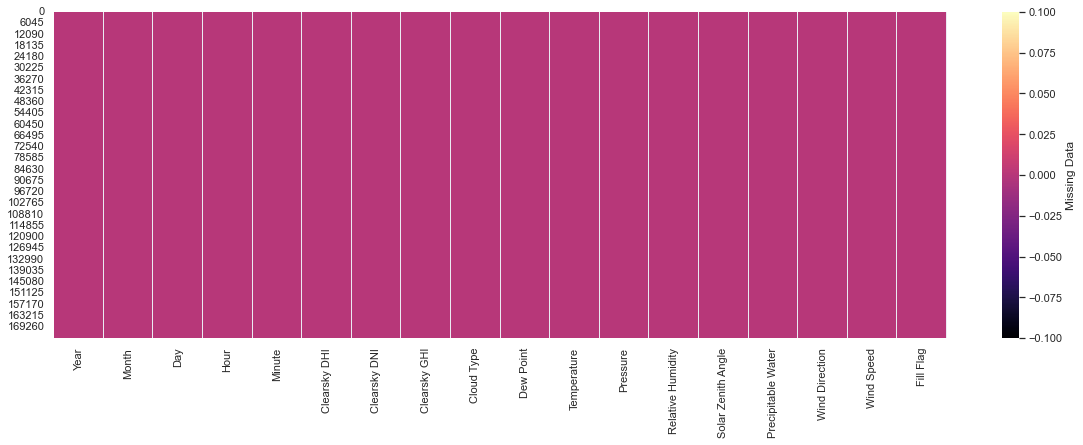

In [39]:
plt.figure(figsize=(20,6))
sns.heatmap(completeDf.isna(),
            cmap="magma",
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

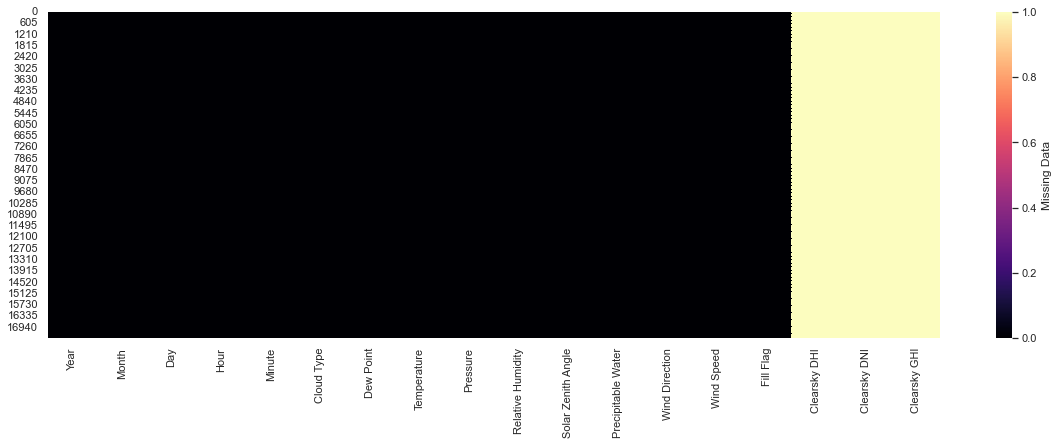

In [40]:
plt.figure(figsize=(20,6))
sns.heatmap(testDf.isna(),
            cmap="magma",
            cbar_kws={'label': 'Missing Data'})

In [41]:
completeDf.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [42]:
testDf.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [43]:
rawCsvSample.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [44]:
rawCsvSample.shape

(17520, 3)

# The Date

In [59]:
completeDf.tail()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Date
175291,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.7,204.0,3.5,100,2018-12-31 21:30:00
175292,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.8,209.0,3.2,100,2018-12-31 22:00:00
175293,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.8,208.0,2.6,57,2018-12-31 22:30:00
175294,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.7,206.0,2.1,0,2018-12-31 23:00:00
175295,0,0,0,7,18.7,19.2,1009,96.84,100.22,3.7,206.0,2.1,0,2018-12-31 23:30:00


In [46]:
completeDf['dateStr']=  completeDf['Day'].astype(str).str.zfill(2) + completeDf['Month'].astype(str).str.zfill(2)+ completeDf['Year'].astype(str) + completeDf['Hour'].astype(str).str.zfill(2) \
                         + completeDf['Minute'].astype(str).str.zfill(2)
completeDf['Date'] = pd.to_datetime(completeDf['dateStr'], format='%d%m%Y%H%M')

In [47]:
completeDf.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,dateStr,Date
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,010120090000,2009-01-01 00:00:00
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,010120090030,2009-01-01 00:30:00
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,010120090100,2009-01-01 01:00:00
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,010120090130,2009-01-01 01:30:00
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,010120090200,2009-01-01 02:00:00


In [48]:
del completeDf['Year'],completeDf['Month'], completeDf['Day'], completeDf['Hour'], completeDf['Minute'], completeDf['dateStr']

In [49]:
completeDf.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Date
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00


In [61]:
#Making Date as the index Column
completeDf.set_index("Date", inplace=True)

In [62]:
completeDf.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Date,,,,,,,,,,,,,
2009-01-01 00:00:00,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
2009-01-01 00:30:00,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2009-01-01 01:00:00,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
2009-01-01 01:30:00,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
2009-01-01 02:00:00,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


# Explore The Data

In [63]:
completeDf.describe()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [64]:
corr = completeDf.corr()
corr.style.background_gradient(cmap='Spectral').set_precision(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Clearsky DHI,1,0.86,0.91,0.022,0.22,0.5,-0.094,-0.56,-0.87,0.21,-0.00019,0.32,0.00074
Clearsky DNI,0.86,1,0.93,-0.073,0.034,0.38,0.007,-0.68,-0.89,-0.0022,0.0063,0.38,0.0063
Clearsky GHI,0.91,0.93,1,-0.047,0.14,0.48,-0.051,-0.66,-0.89,0.11,0.0049,0.35,-0.03
Cloud Type,0.022,-0.073,-0.047,1,0.2,0.067,-0.14,0.24,0.027,0.33,-0.082,0.073,0.09
Dew Point,0.22,0.034,0.14,0.2,1,0.85,-0.42,0.19,-0.22,0.88,-0.076,-0.14,0.037
Temperature,0.5,0.38,0.48,0.067,0.85,1,-0.37,-0.34,-0.53,0.74,-0.067,-0.047,0.016
Pressure,-0.094,0.007,-0.051,-0.14,-0.42,-0.37,1,-0.085,0.079,-0.37,-0.18,-0.12,0.053
Relative Humidity,-0.56,-0.68,-0.66,0.24,0.19,-0.34,-0.085,1,0.61,0.18,-0.019,-0.17,0.024
Solar Zenith Angle,-0.87,-0.89,-0.89,0.027,-0.22,-0.53,0.079,0.61,1,-0.18,0.0038,-0.3,-0.029
Precipitable Water,0.21,-0.0022,0.11,0.33,0.88,0.74,-0.37,0.18,-0.18,1,-0.11,-0.11,0.044


In [65]:
"""
From the Covariance Matrix its clear the Clearsky DHI, DNI and GHI are codependent a bit so finding one would be quite helpful, GHI -> DNI -> DHI, in that order preferably. 
Also Solar Zenith Angle & Relative Humidity looks to have some relationship. 
"""

'\nFrom the Covariance Matrix its clear the Clearsky DHI, DNI and GHI are codependent a bit so finding one would be quite helpful, GHI -> DNI -> DHI, in that order preferably. \nAlso Solar Zenith Angle & Relative Humidity looks to have some relationship. \n'

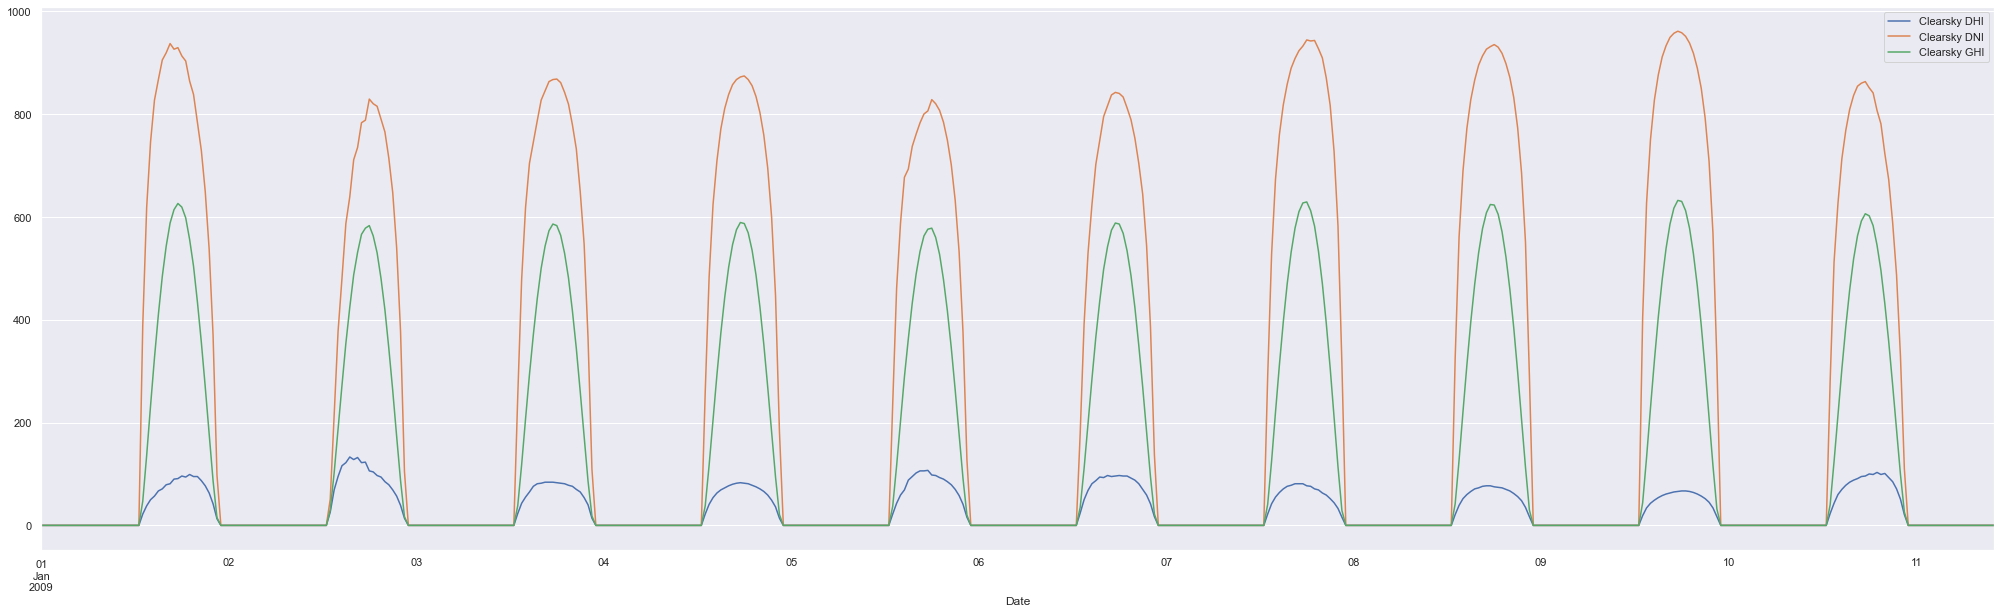

In [66]:
plt.figure(figsize=(35,10))
completeDf['Clearsky DHI'][:501].plot()
completeDf['Clearsky DNI'][:501].plot()
completeDf['Clearsky GHI'][:501].plot()
plt.legend()

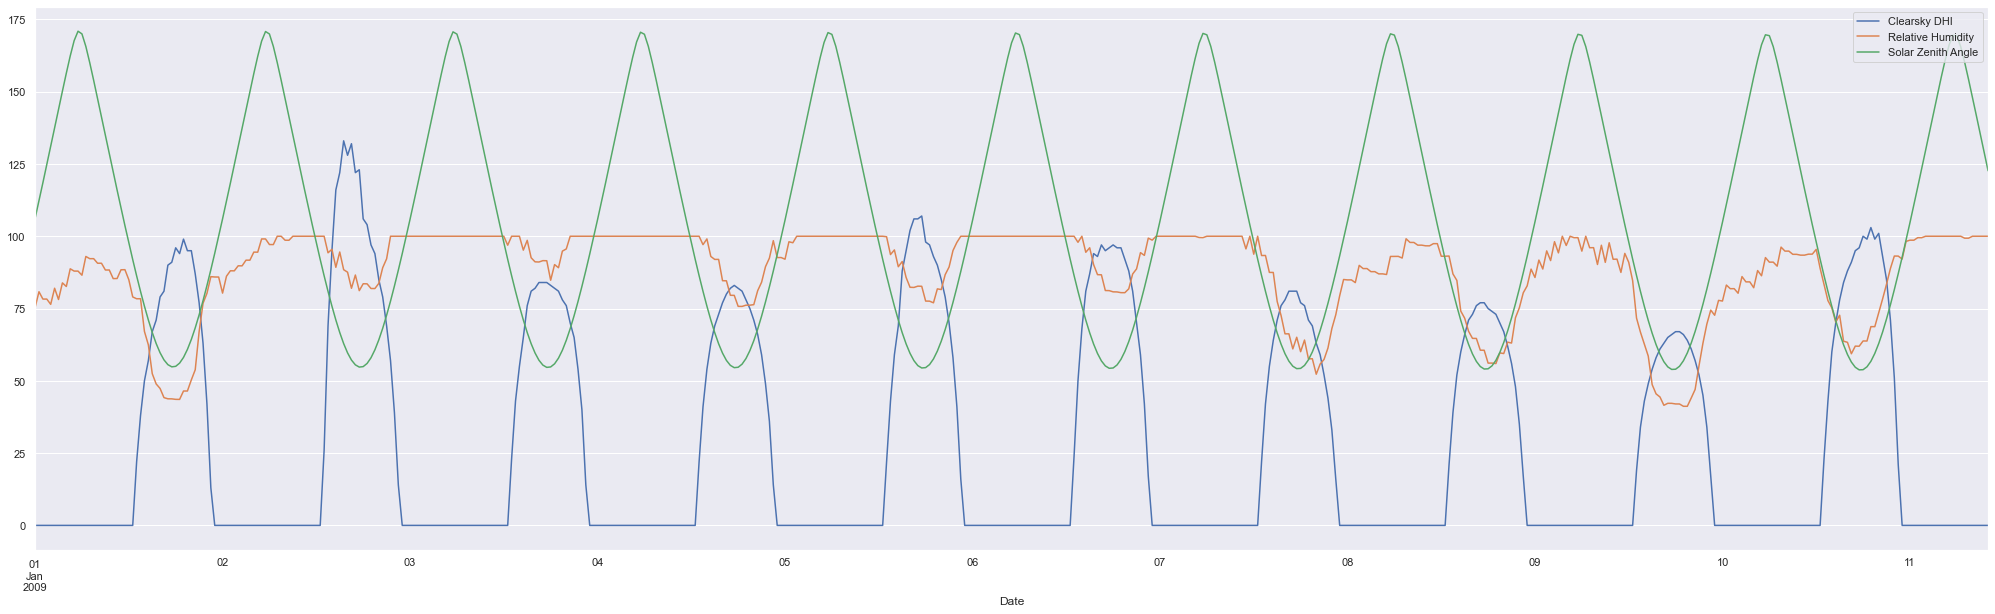

In [67]:
plt.figure(figsize=(35,10))
completeDf['Clearsky DHI'][:501].plot()
# completeDf['Clearsky DNI'][:501].plot()
#completeDf['Clearsky GHI'][:501].plot()
completeDf['Relative Humidity'][:501].plot()
completeDf['Solar Zenith Angle'][:501].plot()
plt.legend()

In [68]:
"""
The above shows how closely ClearSky DHI and SZ Angle is. Also to some extent Rel H. also matches the pattern
"""

'\nThe above shows how closely ClearSky DHI and SZ Angle is. Also to some extent Rel H. also matches the pattern\n'

# Setting The Frequency

In [84]:
completeDfFreq = completeDf.asfreq('30min')

In [85]:
completeDfFreq.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Date,,,,,,,,,,,,,
2009-01-01 00:00:00,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
2009-01-01 00:30:00,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2009-01-01 01:00:00,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
2009-01-01 01:30:00,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
2009-01-01 02:00:00,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [86]:
completeDfFreq.isna().sum()

Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [87]:
"""
So we had no problems setting the frequency of the data
"""

'\nSo we had no problems setting the frequency of the data\n'

# Splitting The Data

In [88]:
size = int(len(completeDf)*0.8)

In [89]:
trainDf = completeDf.iloc[:size]
testDf = completeDf.iloc[size:]
size

140236

In [93]:
trainDf.tail()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Date,,,,,,,,,,,,,
2016-12-31 11:30:00,0,0,0,0,-2.0,1.0,1010,78.02,103.65,1.156,162.3,0.9,1
2016-12-31 12:00:00,0,0,0,0,-2.0,1.0,1010,78.56,97.69,1.199,158.2,1.0,1
2016-12-31 12:30:00,0,0,0,0,-2.0,2.0,1010,73.13,91.88,1.261,158.2,1.1,1
2016-12-31 13:00:00,23,285,41,0,-1.0,3.0,1010,74.55,86.26,1.323,155.0,1.3,1
2016-12-31 13:30:00,44,510,124,0,-1.0,4.0,1010,69.49,80.88,1.377,155.0,1.5,1


In [92]:
testDf.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Date,,,,,,,,,,,,,
2016-12-31 14:00:00,61,616,212,0,-1.0,5.0,1010,63.44,75.78,1.431,156.3,1.7,1
2016-12-31 14:30:00,72,703,300,0,-1.0,6.0,1010,59.19,71.03,1.481,156.3,1.7,1
2016-12-31 15:00:00,84,743,378,0,0.0,8.0,1010,60.61,66.72,1.532,156.4,1.8,1
2016-12-31 15:30:00,90,786,448,0,0.0,9.0,1010,56.60,62.92,1.550,156.4,2.4,1
2016-12-31 16:00:00,103,790,501,0,-1.0,10.0,1010,45.95,59.74,1.568,167.1,3.0,1
